In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [291]:
NPOINTS = 500
nlist = [3, 4, 5, 6, 10]

## Generating Points

1. From Traingle
2. Using Convex Polygon

Using these two approaches

a. Direct geometric principle and alias method

b. accept reject

In [196]:
def generating_points_correct(NPOINTS, pointstr):
    coeff = np.ones((NPOINTS, len(pointstr)))
    alpha = np.zeros((NPOINTS, len(pointstr) - 1))
        
    for i in range(len(pointstr)):
        if i == 0:
            alpha[:,i] = np.random.uniform(low = 0.0, high= 1.0, size = NPOINTS)
        elif 0 < i < len(pointstr) -1:
            alpha[:, i] = np.random.uniform(low = 0.0, high= 1.0, size = NPOINTS)
            a, b = np.maximum(alpha[:, i], alpha[:, i-1]), np.minimum(alpha[:, i], alpha[:, i-1])
            alpha[:, i], alpha[:, i-1] = a, b
        elif i == len(pointstr) -1:
            #coeff[:, i] = 1 - alpha[:, i-1]
            flag =1
    
    for i in range(len(pointstr)):
        if i == 0:
            coeff[:, i] = alpha[:,i]
        elif 0 < i < len(pointstr) -1:
            coeff[:, i] = (alpha[:, i] - alpha[:, i-1])
        elif i == len(pointstr) -1:
            coeff[:, i] = 1 - alpha[:, i-1]
            
            
    
    data = np.zeros((NPOINTS, len(pointstr)))
    for i in range(2):
        for j in range(len(pointstr)):
            data[:, i] += coeff[:, j]*pointstr[j, i]

    return data

In [227]:
def triangle_area(pointstr):
    a = np.ones(3)
    m = np.vstack((np.transpose(pointstr), a))
    return np.linalg.det(m)/2

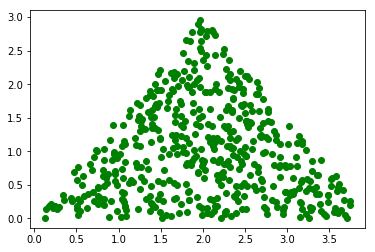

In [294]:
pointstr  = np.array([[0,0], [4, 0], [2,3]])
data1 = np.zeros((NPOINTS, len(pointstr)))
data1 = generating_points_correct(NPOINTS, pointstr)
plt.plot(data1[:, 0], data1[:, 1], 'go')
plt.savefig( 'triangle-polygon.png')

In [289]:
def polygon(NPOINTS, n):
    plt.figure()
    r = 10
    x = 0
    y= 0.0
    angle = np.arange(0, 2*np.pi, (2.0/n)*np.pi)
    pointstr = np.zeros((n, 2))
    for i in range(n):
        pointstr[i, 0] = x + r*np.cos(angle[i])
        pointstr[i, 1] = y + r*np.sin(angle[i])
        plt.plot(pointstr[i,0], pointstr[i,1],'ok')
    area = np.zeros(len(pointstr) -2)
    prob = np.zeros(len(pointstr) -2)
    cumm = np.zeros(len(pointstr) -2)
    
    for i in range(len(pointstr) -2):
        area[i] = triangle_area( np.vstack(( pointstr[0, :],pointstr[i+1:i+3, :] )) )
    prob = area/area.sum()  
    
    #implement alias mehtod 
    for i in range(len(pointstr) -2):
        e =  generating_points_correct(int(NPOINTS*prob[i]),  np.vstack(( pointstr[0, :],pointstr[i+1:i+3, :] )))
        plt.plot(e[:, 0], e[:, 1], 'ro')
    plt.savefig(str(n)+ '-polygon.png')

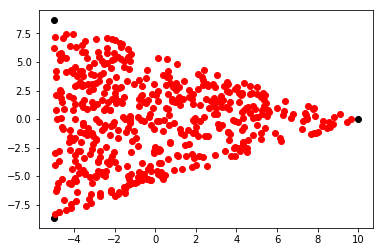

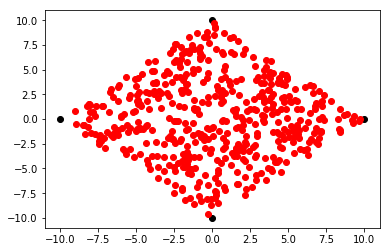

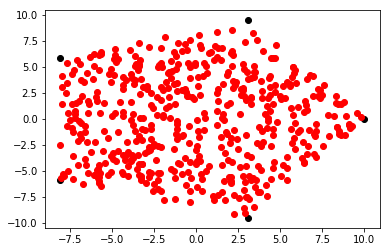

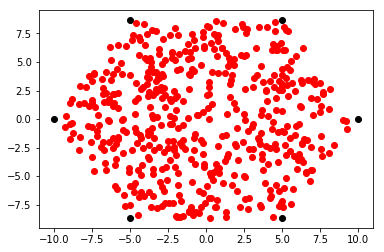

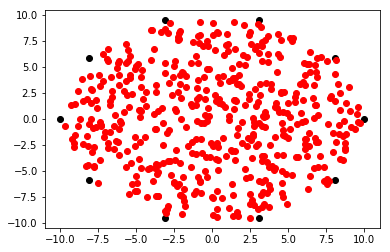

In [292]:
for n in nlist:
    polygon(NPOINTS, n)

## Accept-Reject

We need to check if the point lies inside the polygon or not.
https://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/